In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Call_Data.csv')
data

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.0,98502XXXXX,2,1/1/2022,9.0,9_10,0:01:36,96.0,answered,Agent,YES,0:00:16
1,Executives 4,1000004.0,80595XXXXX,0,1/1/2022,9.0,9_10,0:02:20,140.0,answered,Agent,YES,0:00:26
2,Executives 65,1000065.0,70202XXXXX,0,1/1/2022,9.0,9_10,0:01:25,85.0,answered,AutoWrapped,YES,0:00:16
3,Executives 55,1000055.0,96104XXXXX,1,1/1/2022,9.0,9_10,0:01:31,91.0,answered,Agent,YES,0:00:25
4,Executives 21,1000021.0,82001XXXXX,0,1/1/2022,9.0,9_10,0:02:45,165.0,answered,Agent,YES,0:00:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117983,Executives 7,1000007.0,85399XXXXX,62,1/23/2022,20.0,20_21,0:01:32,92.0,answered,Agent,YES,0:00:42
117984,Executives 36,1000036.0,88397XXXXX,22,1/23/2022,20.0,20_21,0:01:14,74.0,answered,Agent,YES,0:00:15
117985,Executives 48,1000048.0,70035XXXXX,14,1/23/2022,20.0,20_21,0:01:48,108.0,answered,Agent,YES,0:00:23
117986,Executives 33,1000033.0,87773XXXXX,26,1/23/2022,20.0,20_21,0:01:13,73.0,answered,Agent,YES,0:01:05


In [3]:
cols = data.columns.to_list()

In [4]:
data[cols[6]].replace('9_10','09_10', inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117988 entries, 0 to 117987
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Agent_Name          83790 non-null   object 
 1   Agent_ID            83790 non-null   float64
 2   Customer_Phone_No   117988 non-null  object 
 3   Queue_Time(Secs)    117988 non-null  int64  
 4   Date_&_Time         117988 non-null  object 
 5   Time                117988 non-null  float64
 6   Time_Bucket         117988 non-null  object 
 7   Duration(hh:mm:ss)  117988 non-null  object 
 8   Call_Seconds (s)    117988 non-null  float64
 9   Call_Status         117988 non-null  object 
 10  Wrapped _By         70111 non-null   object 
 11  Ringing             117988 non-null  object 
 12  IVR _Duration       117988 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 11.7+ MB


# Average Call Duration for Each Time Bucket

In [6]:
gd = data.groupby(cols[6])
avg_time = round(gd[cols[8]].mean())
avg_time.to_frame().reset_index()

,Time_Bucket,Call_Seconds (s)
0,09_10,92.0
1,10_11,97.0
2,11_12,117.0
3,12_13,145.0
4,13_14,150.0
5,14_15,147.0
6,15_16,170.0
7,16_17,181.0
8,17_18,180.0
9,18_19,174.0


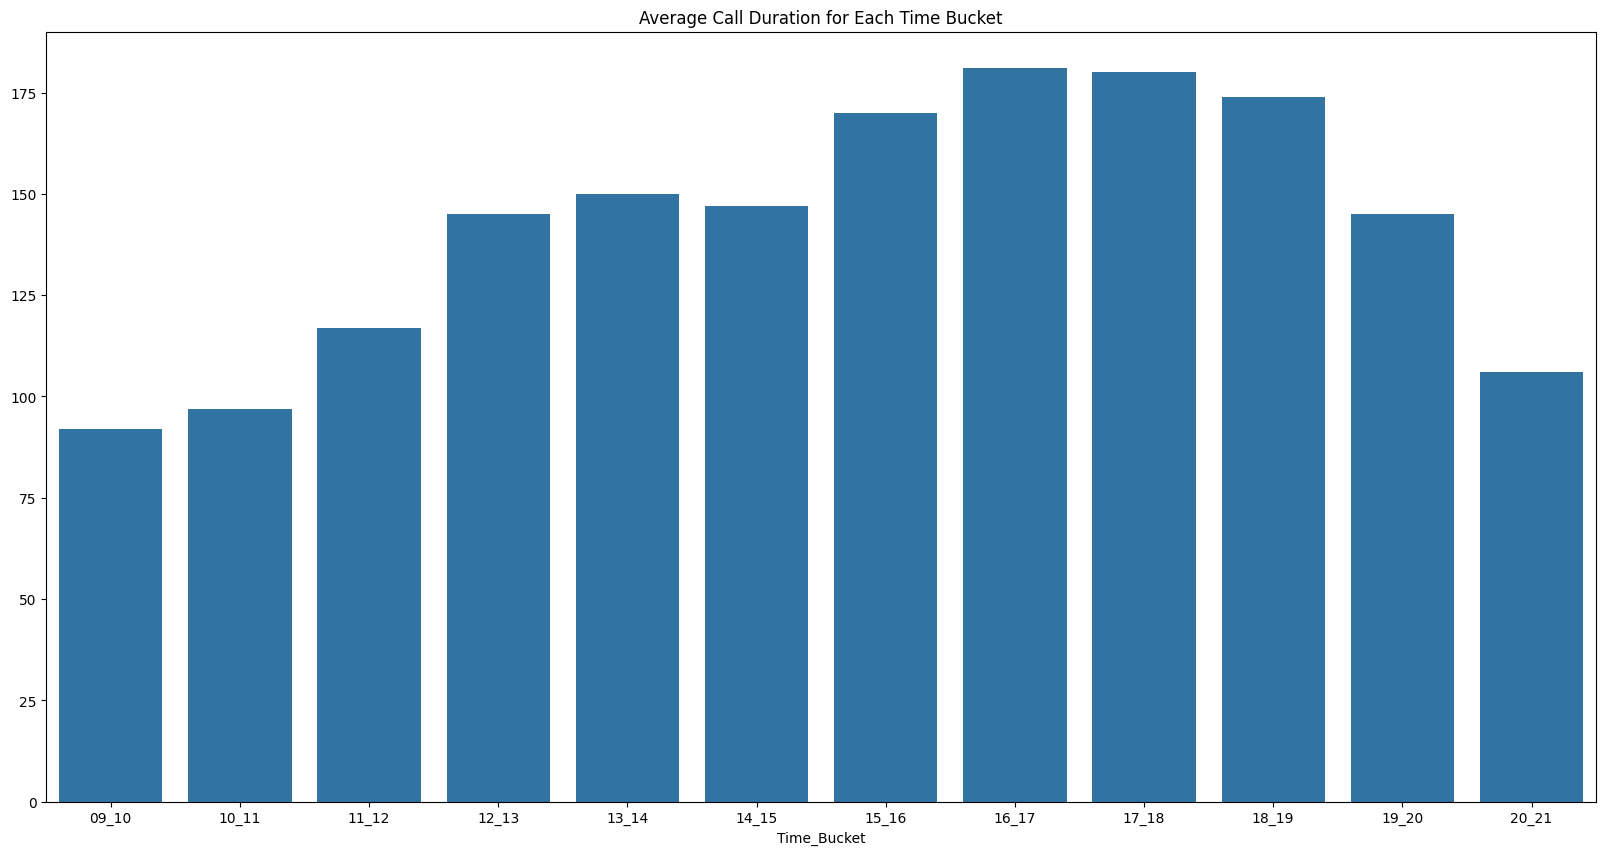

In [7]:
plt.figure( figsize=(20,10) )

sns.barplot(x=avg_time.index, y=avg_time.values)
plt.title("Average Call Duration for Each Time Bucket")

plt.show()

In [8]:
gd2 = data[data[cols[9]]!='abandon'].groupby(cols[6])
avg_time = round(gd2[cols[8]].mean())
avg_time.to_frame().reset_index()

,Time_Bucket,Call_Seconds (s)
0,09_10,199.0
1,10_11,203.0
2,11_12,199.0
3,12_13,191.0
4,13_14,193.0
5,14_15,192.0
6,15_16,196.0
7,16_17,198.0
8,17_18,198.0
9,18_19,200.0


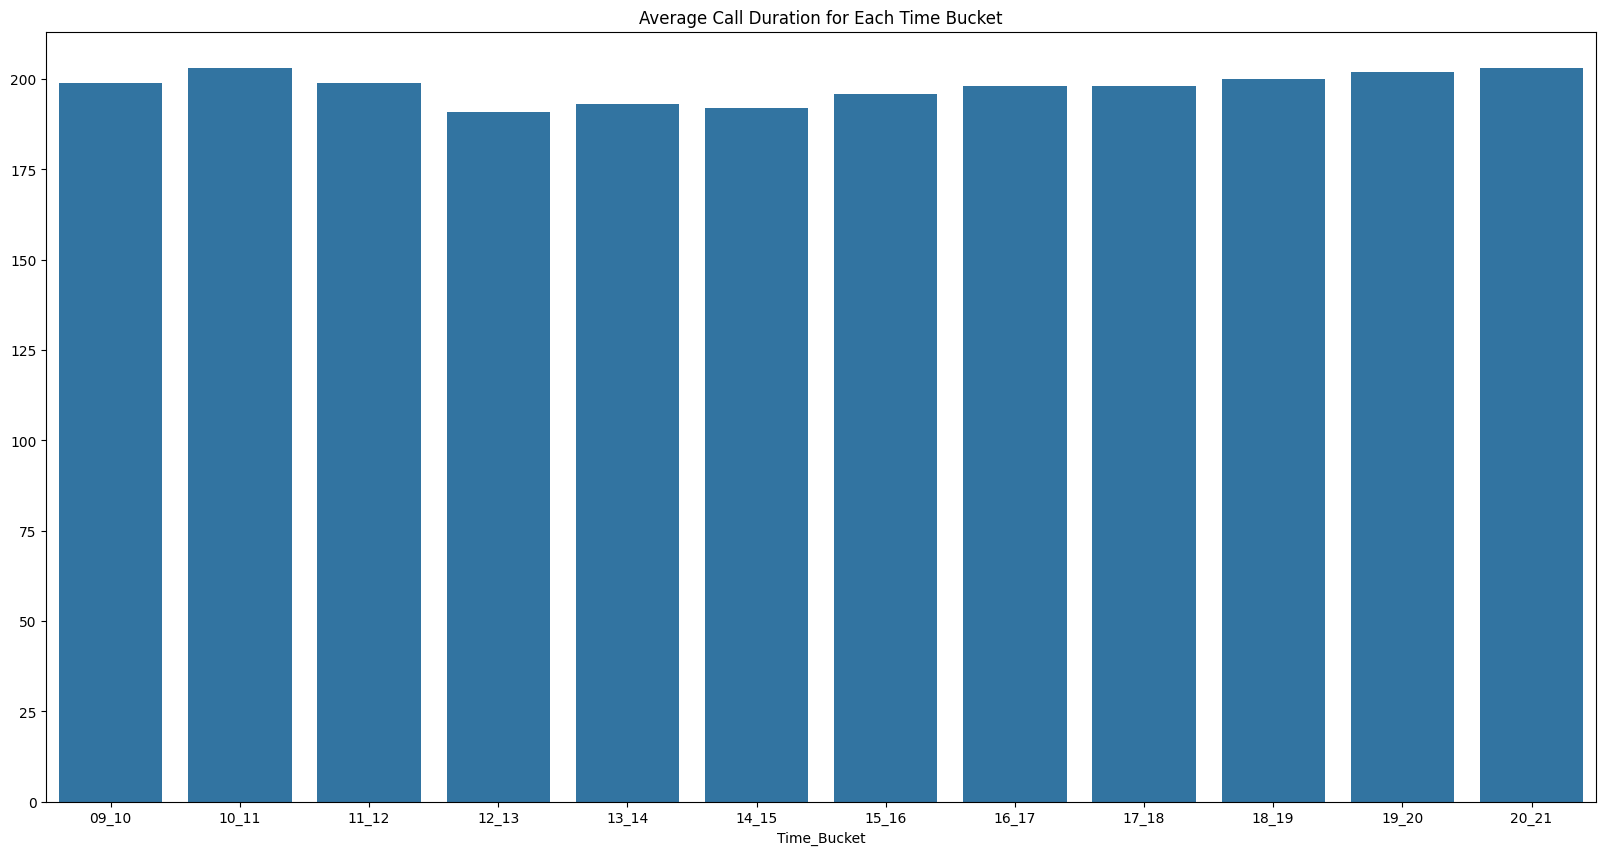

In [9]:
plt.figure( figsize=(20,10) )

sns.barplot(x=avg_time.index, y=avg_time.values)
plt.title("Average Call Duration for Each Time Bucket")

plt.show()

# Call Count of Each Time Bucket

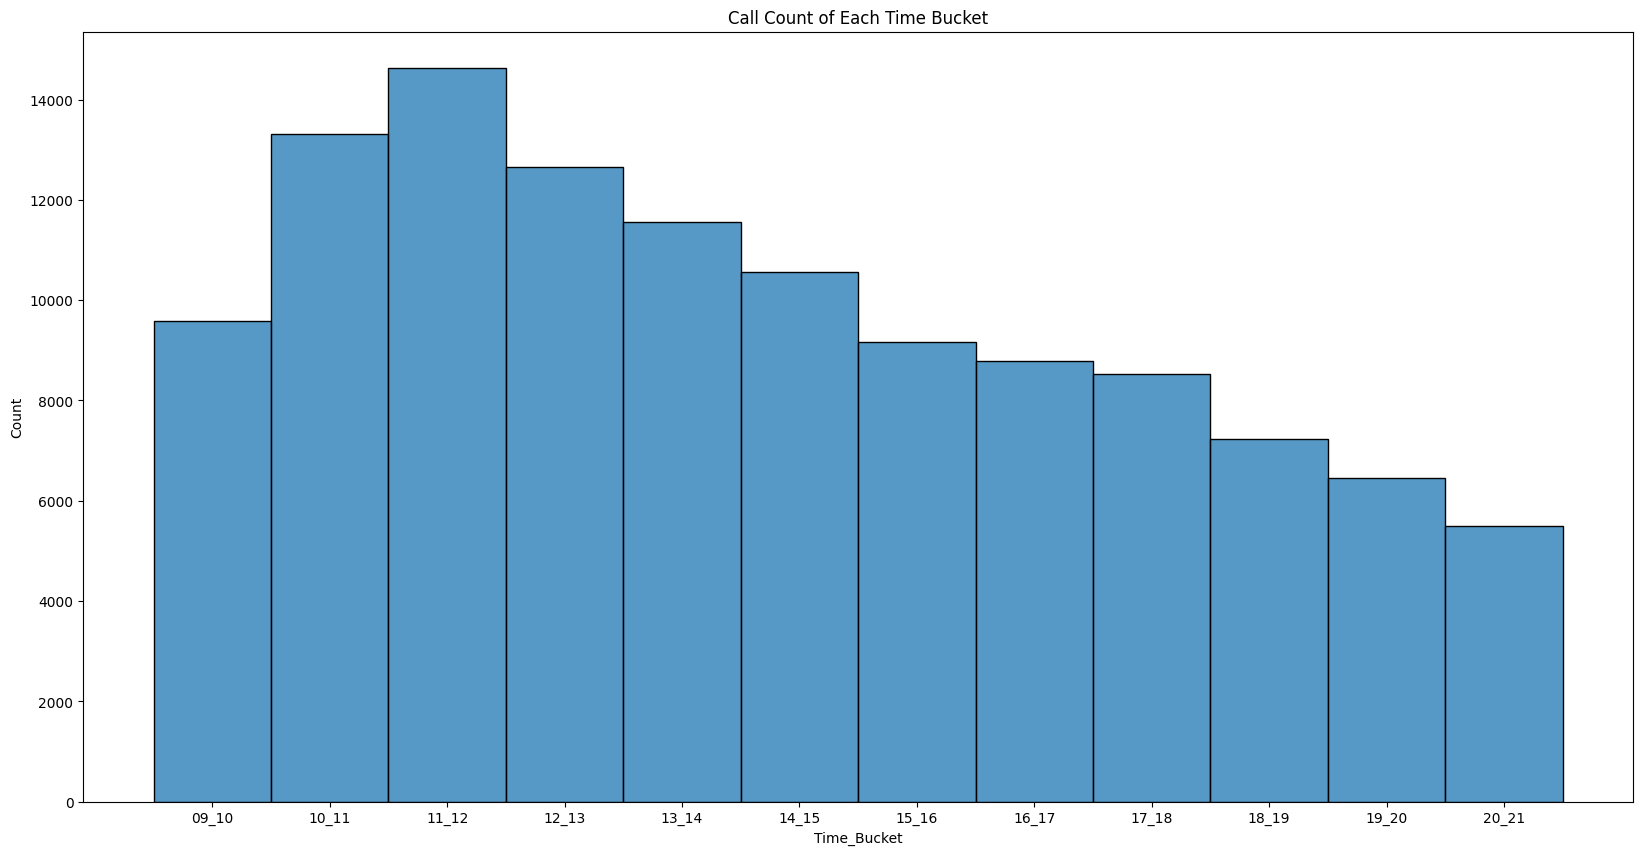

In [10]:
plt.figure(figsize=(20,10))

sns.histplot(data[cols[6]])
plt.title("Call Count of Each Time Bucket")

plt.show()

In [11]:
data2=data[data[cols[9]]!='abandon']

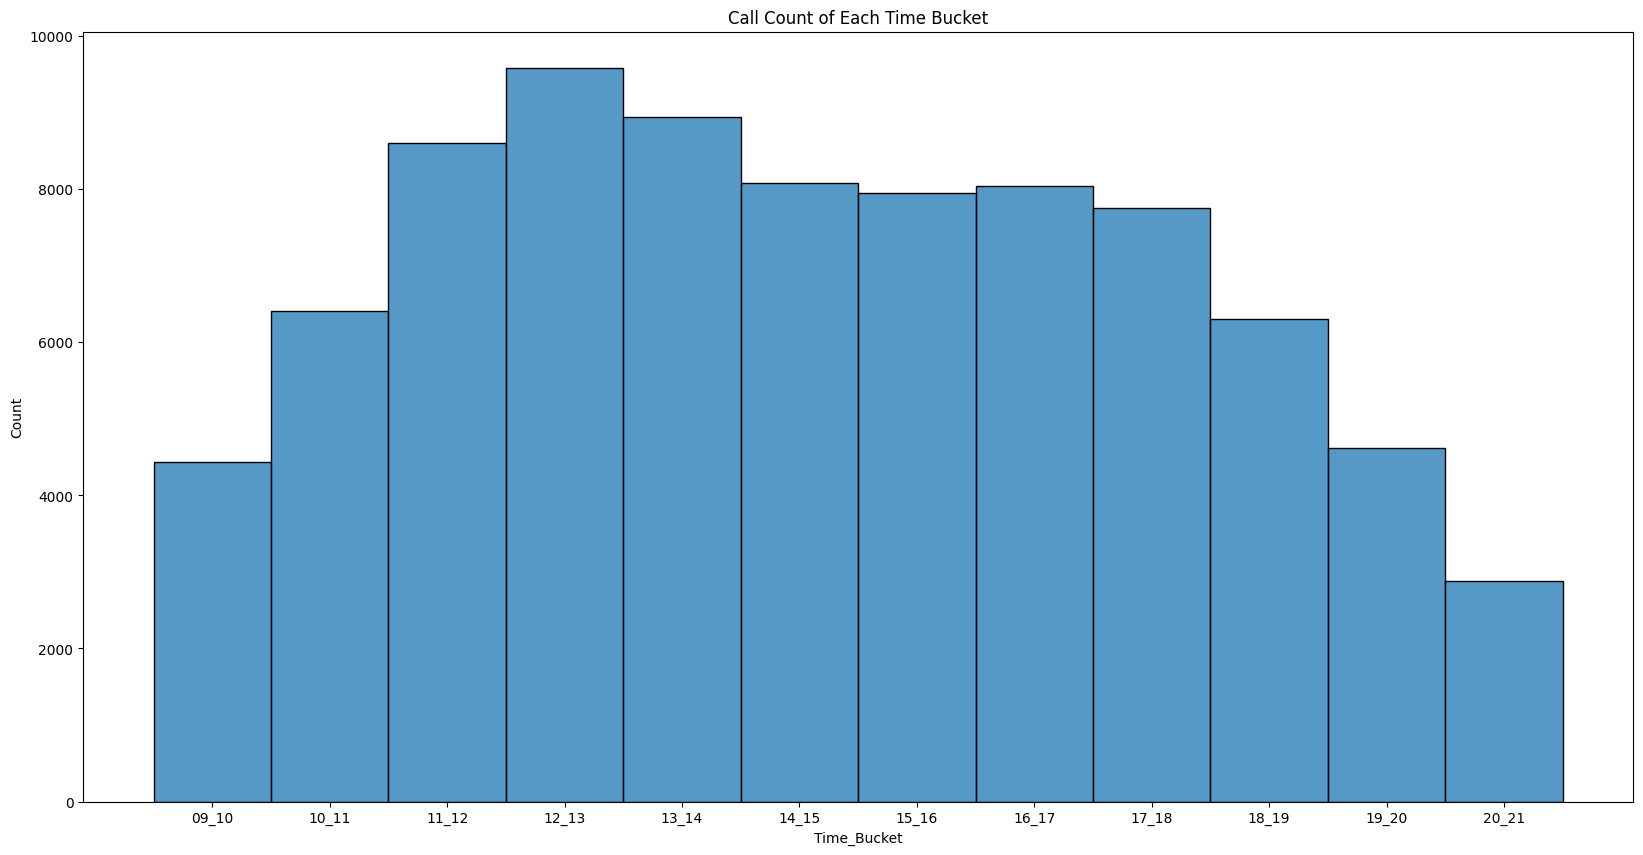

In [12]:
plt.figure(figsize=(20,10))

sns.histplot(data2[cols[6]])
plt.title("Call Count of Each Time Bucket")

plt.show()

# Minimum Agents Required to reduce Abandon Rate to 10%

In [13]:
tot = gd[cols[9]].count()
bs = (gd[cols[9]].value_counts()/tot)*100

In [14]:
bs = bs.to_frame().reset_index()
bs.rename( columns = {0:'Rate'}, inplace=True)

In [15]:
bs.head()

,Time_Bucket,Call_Status,Rate
0,09_10,abandon,53.702545
1,09_10,answered,46.182728
2,09_10,transfer,0.114727
3,10_11,abandon,51.911665
4,10_11,answered,47.832945


In [16]:
ans_calls = bs[bs['Call_Status']=='answered']
ans_calls['Rate']

1     46.182728
4     47.832945
6     58.525913
9     74.549478
12    76.368826
15    75.504214
18    84.725407
21    89.349112
24    89.067260
27    85.659022
30    70.833978
33    52.134423
Name: Rate, dtype: float64

In [17]:
ans_rate = pd.Series( ans_calls['Rate'].values, index=ans_calls['Time_Bucket'] )
ans_rate

Time_Bucket
09_10    46.182728
10_11    47.832945
11_12    58.525913
12_13    74.549478
13_14    76.368826
14_15    75.504214
15_16    84.725407
16_17    89.349112
17_18    89.067260
18_19    85.659022
19_20    70.833978
20_21    52.134423
dtype: float64

In [18]:
agents = gd[cols[1]].nunique()
agents

Time_Bucket
09_10    41
10_11    50
11_12    58
12_13    59
13_14    57
14_15    59
15_16    57
16_17    57
17_18    57
18_19    58
19_20    51
20_21    26
Name: Agent_ID, dtype: int64

In [19]:
req = np.ceil((agents/ans_rate)*90)
req

Time_Bucket
09_10    80.0
10_11    95.0
11_12    90.0
12_13    72.0
13_14    68.0
14_15    71.0
15_16    61.0
16_17    58.0
17_18    58.0
18_19    61.0
19_20    65.0
20_21    45.0
dtype: float64

In [20]:
min_req = (req-agents).astype(int)
min_req

Time_Bucket
09_10    39
10_11    45
11_12    32
12_13    13
13_14    11
14_15    12
15_16     4
16_17     1
17_18     1
18_19     3
19_20    14
20_21    19
dtype: int64

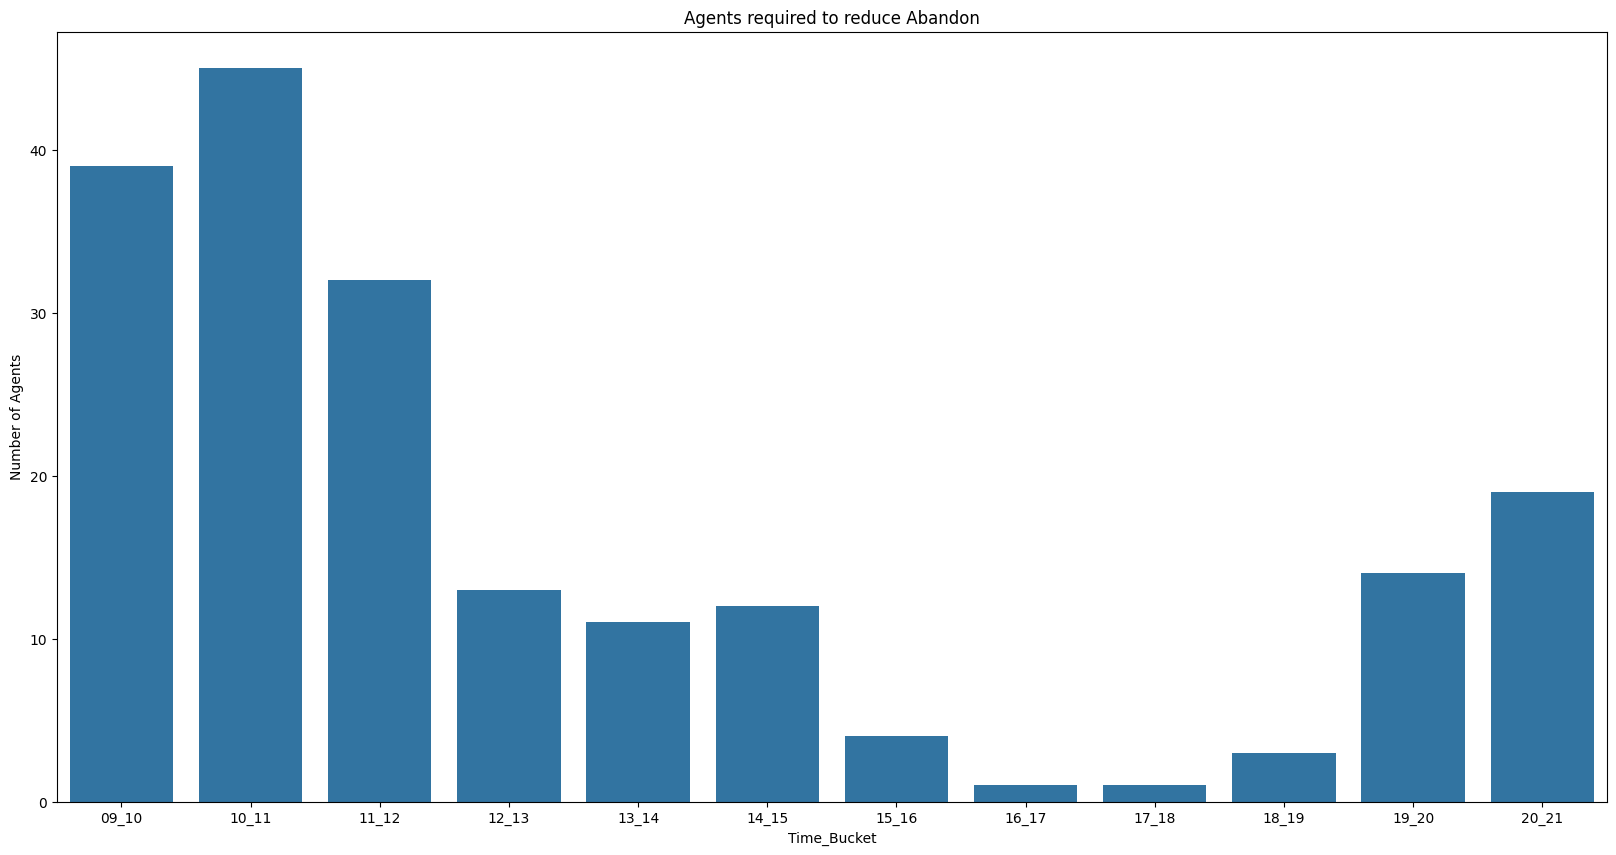

In [21]:
plt.figure(figsize=(20,10))

sns.barplot( x=min_req.index, y=min_req.values)
plt.title("Agents required to reduce Abandon")
plt.xlabel('Time_Bucket')
plt.ylabel('Number of Agents')

plt.show()

# Man Power Required for Night Shift

In [22]:
dist = pd.Series([ 3, 3, 2, 2, 1, 1, 1, 1, 3, 4, 4, 5], 
                 index=[ '21_22', '22_23', '23_00', '00_01', '01_02', '02_03', '03_04', '04_05', '05_06', '06_07', '07_08', '08_09'])

In [23]:
calls  = np.round((dist/100)*data.shape[0])
calls

21_22    3540.0
22_23    3540.0
23_00    2360.0
00_01    2360.0
01_02    1180.0
02_03    1180.0
03_04    1180.0
04_05    1180.0
05_06    3540.0
06_07    4720.0
07_08    4720.0
08_09    5899.0
dtype: float64

In [24]:
avg_agents = np.ceil(req.mean())
avg_agents

69.0

In [25]:
avg_calls = int(gd[cols[2]].count().mean())
avg_calls

9832

In [26]:
agents_req = np.ceil((avg_agents/avg_calls)*calls).astype(int)
agents_req

21_22    25
22_23    25
23_00    17
00_01    17
01_02     9
02_03     9
03_04     9
04_05     9
05_06    25
06_07    34
07_08    34
08_09    42
dtype: int64

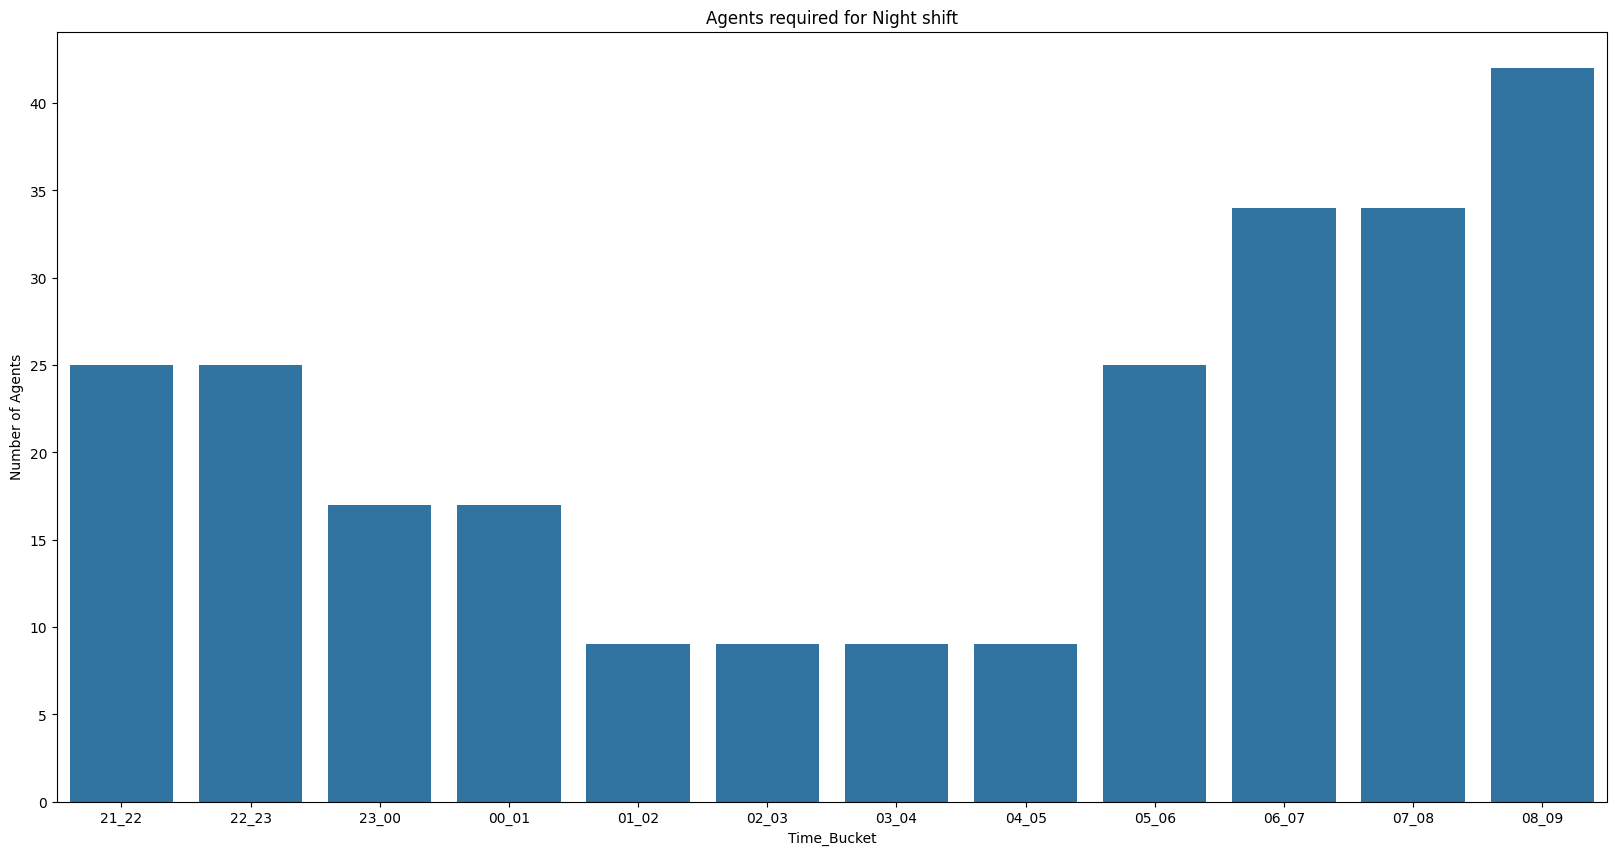

In [27]:
plt.figure(figsize=(20,10))

sns.barplot( x=agents_req.index, y=agents_req.values)
plt.title("Agents required for Night shift")
plt.xlabel('Time_Bucket')
plt.ylabel('Number of Agents')

plt.show()